# Quadruped [Gait](https://en.wikipedia.org/wiki/Gait)

---

Kevin Walchko, created 8 Nov 2016

**OLD, needs to be updated for the new design**

In [1]:
%matplotlib inline

In [2]:
from __future__ import print_function
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm 
from math import sin, cos, pi, sqrt
from math import radians as d2r

In [3]:
from quadruped import Robot
from quadruped import Leg4
from pyservos import AX12

## Hildebrand Diagram

Example diagram from wikipedia:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cf/Gait_graphs.jpg/800px-Gait_graphs.jpg)

$\phi$ is the phase of each leg and $z$ is the foot height. The black bars indicate when a foot is in contact with the ground.

Common gaits for quadrupeds (spider/crab configuration):

* **Ripple Gait:** when one leg is in the air while the other three are holding up the body. This tends to be a stable gait when you keep the center of mass (CM) inside the triangle formed by the three legs in contact with the ground. Becuase of the stability, you could interrupt this gait at any time (i.e., stop it) and the robot will not fall over.

* **Trott Gait:** A fast gait where two legs are in the air moving while the other two legs are in contact with the ground. This is an unstable gait and the robot could fall over if the gait is not executed quickly enough.

Terminology:

* **Duty Factor:** Duty factor is simply the percent of the total cycle which a given foot is on the ground. Duty factors over 50% are considered a "walk", while those less than 50% are considered a run. 

* **Forelimb-hindlimb Phase (or just Phase):** is the temporal relationship between the limb pairs.

## Discrete Ripple Gait

The gait uses an array to hold the leg/foot positions in an attempt to simplify the coding and reduce the computational requirements.

## Continous Ripple Gait

Unlike the discrete gait above, this continous gait can be interpolated into finer steps in an attempt to slow down the speed of the gait or produce smoother movements.

## Gait Plot

Now select which gait you want and run it for just one leg. In reality you would need to do this for all 4 legs.

Now the code below runs the for all 4 legs and only prints out the position for leg 0. You can modify this above in the `printFoot` function. In reality, you would pass a function to move the leg. 

# References

---

* https://en.wikipedia.org/wiki/Gait
* 


-----------

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.

In [4]:
data = {
    # leg3/4
    # [ length, (limits), offset]
    'coxa':   [28, [-45, 45], 150],
    'femur':  [90, [-95, 95], 150],
    'tibia':  [84, [-140, 140], 150],
    'tarsus': [98, [-95, 95], 150],

    # gait
    # Angles: 0.00 75.60 -120.39 -45.22
    'stand': [0, 75, -120, -45],
    'sit': [0, 90, -90, -90],

    # engine
    # 'serialPort': '/dev/ttyUSB0',
    # 'write': 'bulk'
}

In [21]:
def plotFootPos(m, index):
    x=[]
    y=[]
    z=[]
    for a in m:
        x.append(a[index][0])
        y.append(a[index][1])
        z.append(a[index][2])
        
    plt.subplot(1,2,1)
    plt.plot(x,y,'bs-')
    plt.grid(True)
    plt.title('x-y plane [mm]')
    
    plt.subplot(1,2,2)
    plt.plot(z,'bs-')
    plt.grid(True)
    plt.title('Height (z [mm])')

In [ ]:
def hil(mov, p):
    d=[]
    for step in m: # [step0, step1, ...]
        k=[]
        for i,z in enumerate(step): # [leg0, leg1, ...]
            

In [52]:
def plotFeetPos(m):
    def getPos(m, index):
        x=[]
        y=[]
        z=[]
        for a in m:
            x.append(a[index][0])
            y.append(a[index][1])
            z.append(a[index][2])
        return x, y, z
    
#     def hil(mov, p):
#         d=[]
#         for step in m:
#             k=[]
#             for i,z in enumerate(step):
                
            
    
    xx=[]
    yy=[]
    zz=[]
    for i in range(4):
        x,y,z = getPos(m,i)
        xx.append(x)
        yy.append(y)
        zz.append(z)
    
    lines = ['rs-','gs-','bs-','ys-']
    for i in range(4):
        plt.subplot(3,2,i+1)
        plt.plot(xx[i],yy[i],lines[i])
        plt.grid(True)
        plt.title('x-y plane [mm]')
#         plt.axis('equal')
    
    plt.subplot(3,1,3)
    plt.plot(zz[0],'rs-',zz[1],'gs-',zz[2],'bs-',zz[3],'ys-')
    plt.grid(True)
    plt.ylabel('Height (z [mm])')
    plt.xlabel('Step')

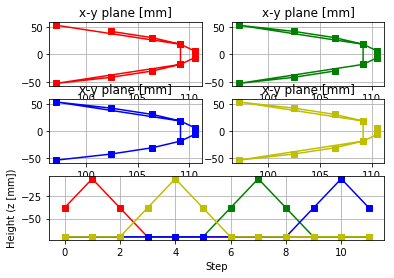

In [53]:
plotFeetPos(mov)

In [6]:
robot = Robot(data, Leg4, AX12)

*** Using dummy serial port!!! ***
stand (110.6906836788969, 0.0, -70.46364525365382)
stand (0.0, 74.99999999999999, -119.99999999999997, -45.0)


In [7]:
cmd = [0,0,1]
mov = robot.gaits['crawl'].command(cmd)

In [8]:
for a,b,c,d in mov:
    foot = '{:6.1f} {:6.1f} {:6.1f} mm'
    print('*'*35)
    print(' Leg 0: ' + foot.format(*a))
    print(' Leg 1: ' + foot.format(*b))
    print(' Leg 2: ' + foot.format(*c))
    print(' Leg 3: ' + foot.format(*d))

***********************************
 Leg 0:   97.1   53.1  -38.0 mm
 Leg 1:  109.2  -18.4  -70.5 mm
 Leg 2:   97.1  -53.1  -70.5 mm
 Leg 3:  109.2   18.4  -70.5 mm
***********************************
 Leg 0:  109.2   18.4   -5.5 mm
 Leg 1:  110.5   -6.1  -70.5 mm
 Leg 2:  102.4  -42.0  -70.5 mm
 Leg 3:  106.4   30.4  -70.5 mm
***********************************
 Leg 0:  109.2  -18.4  -38.0 mm
 Leg 1:  110.5    6.1  -70.5 mm
 Leg 2:  106.4  -30.4  -70.5 mm
 Leg 3:  102.4   42.0  -70.5 mm
***********************************
 Leg 0:   97.1  -53.1  -70.5 mm
 Leg 1:  109.2   18.4  -70.5 mm
 Leg 2:  109.2  -18.4  -70.5 mm
 Leg 3:   97.1   53.1  -38.0 mm
***********************************
 Leg 0:  102.4  -42.0  -70.5 mm
 Leg 1:  106.4   30.4  -70.5 mm
 Leg 2:  110.5   -6.1  -70.5 mm
 Leg 3:  109.2   18.4   -5.5 mm
***********************************
 Leg 0:  106.4  -30.4  -70.5 mm
 Leg 1:  102.4   42.0  -70.5 mm
 Leg 2:  110.5    6.1  -70.5 mm
 Leg 3:  109.2  -18.4  -38.0 mm
****************

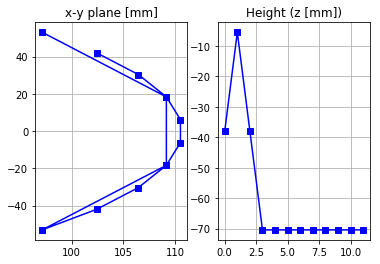

In [22]:
plotFootPos(mov,0)

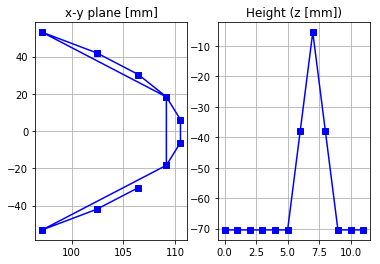

In [23]:
plotFootPos(mov,1)

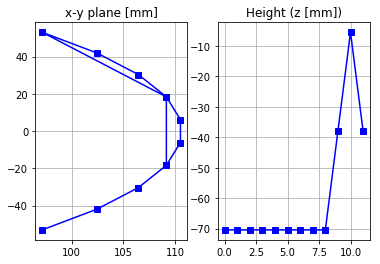

In [24]:
plotFootPos(mov,2)

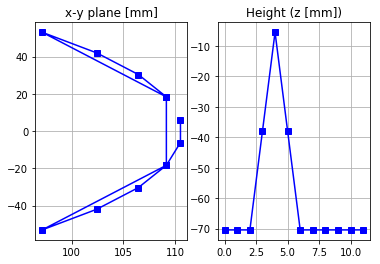

In [25]:
plotFootPos(mov,3)

In [11]:
angles = robot.kinematics.generateServoAngles(mov)

*************************
  DH: [29 87 -108 -69]
  DH: [-10 75 -120 -45]
  DH: [-29 75 -120 -45]
  DH: [10 75 -120 -45]
*************************
  DH: [10 91 -89 -92]
  DH: [-3 75 -120 -45]
  DH: [-22 75 -120 -45]
  DH: [16 75 -120 -45]
*************************
  DH: [-10 87 -108 -69]
  DH: [3 75 -120 -45]
  DH: [-16 75 -120 -45]
  DH: [22 75 -120 -45]
*************************
  DH: [-29 75 -120 -45]
  DH: [10 75 -120 -45]
  DH: [-10 75 -120 -45]
  DH: [29 87 -108 -69]
*************************
  DH: [-22 75 -120 -45]
  DH: [16 75 -120 -45]
  DH: [-3 75 -120 -45]
  DH: [10 91 -89 -92]
*************************
  DH: [-16 75 -120 -45]
  DH: [22 75 -120 -45]
  DH: [3 75 -120 -45]
  DH: [-10 87 -108 -69]
*************************
  DH: [-10 75 -120 -45]
  DH: [29 87 -108 -69]
  DH: [10 75 -120 -45]
  DH: [-29 75 -120 -45]
*************************
  DH: [-3 75 -120 -45]
  DH: [10 91 -89 -92]
  DH: [16 75 -120 -45]
  DH: [-22 75 -120 -45]
*************************
  DH: [3 75 -120 -45]


In [19]:
def plotServoAngles(cycle, index):
    sa=[]
    sb=[]
    sc=[]
    sd=[]
    leg = cycle[index]
    for a,b,c,d in leg:
        sa.append(a)
        sb.append(b)
        sc.append(c)
        sd.append(d)
    plt.plot(sa,'rs-',label='Servo 0')
    plt.plot(sb,'gs-',label='Servo 1')
    plt.plot(sc,'bs-',label='Servo 2')
    plt.plot(sd,'ys-',label='Servo 3')
    plt.title('Leg {}'.format(index))
    plt.ylabel('Angle [deg]')
    plt.xlabel('Step')
    plt.legend()
    plt.grid(True)

In [13]:
for a,b,c,d in zip(*angles):
    foot = '{:6.1f} {:6.1f} {:6.1f} {:6.1f} deg'
    print('*'*35)
    print(' Leg 0: ' + foot.format(*a))
    print(' Leg 1: ' + foot.format(*b))
    print(' Leg 2: ' + foot.format(*c))
    print(' Leg 3: ' + foot.format(*d))

***********************************
 Leg 0:  178.6  237.3   41.8   80.8 deg
 Leg 1:  140.5  225.0   30.0  105.0 deg
 Leg 2:  121.4  225.0   30.0  105.0 deg
 Leg 3:  159.5  225.0   30.0  105.0 deg
***********************************
 Leg 0:  159.5  240.8   60.9   58.3 deg
 Leg 1:  146.8  225.0   30.0  105.0 deg
 Leg 2:  127.7  225.0   30.0  105.0 deg
 Leg 3:  165.9  225.0   30.0  105.0 deg
***********************************
 Leg 0:  140.5  237.3   41.8   80.8 deg
 Leg 1:  153.2  225.0   30.0  105.0 deg
 Leg 2:  134.1  225.0   30.0  105.0 deg
 Leg 3:  172.3  225.0   30.0  105.0 deg
***********************************
 Leg 0:  121.4  225.0   30.0  105.0 deg
 Leg 1:  159.5  225.0   30.0  105.0 deg
 Leg 2:  140.5  225.0   30.0  105.0 deg
 Leg 3:  178.6  237.3   41.8   80.8 deg
***********************************
 Leg 0:  127.7  225.0   30.0  105.0 deg
 Leg 1:  165.9  225.0   30.0  105.0 deg
 Leg 2:  146.8  225.0   30.0  105.0 deg
 Leg 3:  159.5  240.8   60.9   58.3 deg
********************

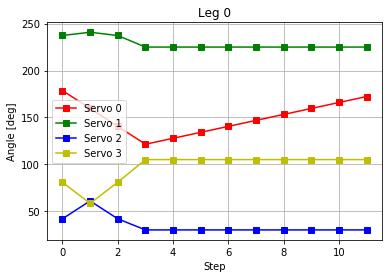

In [20]:
plotServoAngles(angles, 0)

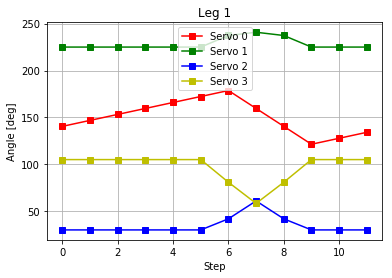

In [47]:
plotServoAngles(angles, 1)

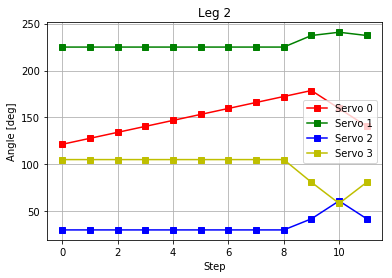

In [48]:
plotServoAngles(angles, 2)

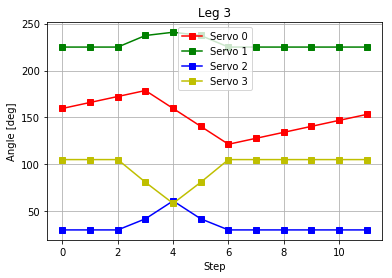

In [49]:
plotServoAngles(angles, 3)

# test

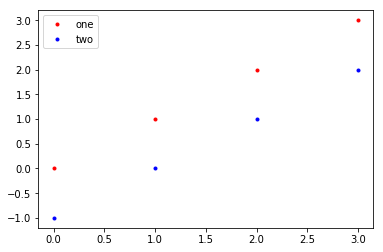

In [47]:
plt.plot(range(0,4),'r.',label='one')
plt.plot(range(-1,3),'b.',label='two')
plt.legend();

In [35]:
mov[1]

[[104.798127169009, 5.892556509887893, -5.463645253653823],
 [112.65486918219287, 1.9641855032959654, -70.46364525365382],
 [96.94138515582515, 13.749298523071758, -70.46364525365382],
 [120.51161119537673, 9.820927516479827, -70.46364525365382]]

AttributeError: 'module' object has no attribute 'set_yticklabels'

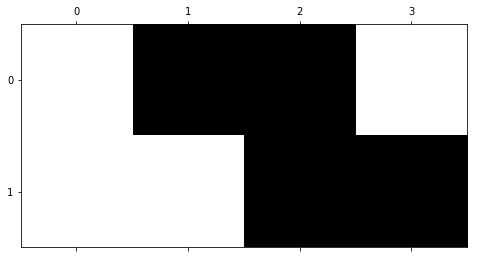

In [90]:
data1 = np.random.random([6, 6])
data1 = [[1,0,0,1],[1,1,0,0]]
# plt.imshow(data1, cmap=plt.cm.gray)
plt.matshow(data1, cmap=plt.cm.gray)
plt.set_yticklabels(['PG3', 'PG5'])

In [89]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [59]:
colors = plt.cm.BuPu(np.linspace(0, 0.5, 5))

In [60]:
colors

array([[0.96862745, 0.98823529, 0.99215686, 1.        ],
       [0.87792388, 0.92510573, 0.95664744, 1.        ],
       [0.74800461, 0.82674356, 0.9015917 , 1.        ],
       [0.61877739, 0.73550173, 0.85397924, 1.        ],
       [0.54901961, 0.58559016, 0.77517878, 1.        ]])

<BarContainer object of 12 artists>

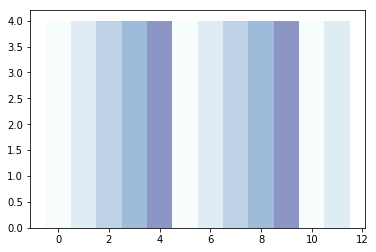

In [71]:
data = [4]*12
plt.bar(range(12), data, 1, color=colors)